<a href="https://colab.research.google.com/github/dmml-heriot-watt/group-coursework-ha/blob/harry-branch/DM_KMeansClustering_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185329 sha256=89c8f56e3afa29d9483623e8bf93d161d117de017c7c1c8b31736bcd46855eb7
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pyod.models.ecod import ECOD

In [3]:
df = pd.read_csv('Spotify-Clean2.csv', encoding = 'latin-1')
#features = list(df.columns)[5,6,7,8,10,11,13,14]
x = df.iloc[:, [5,6,7,8,10,11,13,14]]
z = df.iloc[:, 5:]
df = df.iloc[:, 3:]

pca = PCA(2)
data = pca.fit_transform(x)
data_z = pca.fit_transform(z)


#X = df[features]

In [4]:
data.shape

(603, 2)

In [5]:
df.top_genre.unique()

array(['neo mellow', 'detroit hip hop', 'dance pop', 'pop',
       'canadian pop', 'hip pop', 'barbadian pop', 'atl hip hop',
       'australian pop', 'indie pop', 'art pop', 'colombian pop',
       'big room', 'british soul', 'chicago rap', 'acoustic pop',
       'permanent wave', 'boy band', 'baroque pop', 'celtic rock',
       'electro', 'complextro', 'canadian hip hop', 'candy pop',
       'alaska indie', 'folk-pop', 'metropopolis', 'house',
       'australian hip hop', 'electropop', 'australian dance',
       'hollywood', 'canadian contemporary r&b',
       'irish singer-songwriter', 'tropical house', 'belgian edm',
       'french indie pop', 'hip hop', 'danish pop', 'latin',
       'canadian latin', 'electronic trap', 'edm', 'electro house',
       'downtempo', 'brostep', 'contemporary country', 'moroccan pop',
       'escape room', 'alternative r&b'], dtype=object)

In [6]:
df.top_genre.value_counts()

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
brostep                        2
downtempo                      2
electronic trap                2
belgian edm                    2
escape room                    2
folk-pop                       2
electro                        2
indie pop                      2
detroit hi

In [7]:
modified_df = df

In [8]:
#adds all instances of pop in the genre column into one shared genre
for i in modified_df.top_genre:
    if 'pop' in i:
        modified_df.top_genre = modified_df.top_genre.replace(i, 'pop')

    elif 'hip hop' in i:
        modified_df.top_genre = modified_df.top_genre.replace(i, 'hip hop')

    elif 'edm' in i:
        modified_df.top_genre = modified_df.top_genre.replace(i, 'edm')

    elif 'r&b' in i:
        modified_df.top_genre = modified_df.top_genre.replace(i, 'pop')

    elif 'latin' in i:
        modified_df.top_genre = modified_df.top_genre.replace(i, 'latin')

    elif 'room' in i:
        modified_df.top_genre = modified_df.top_genre.replace(i, 'room')

    elif 'electro' in i:
        modified_df.top_genre = modified_df.top_genre.replace(i, 'edm')

#replaces all instances of chicago rap with hip hop
modified_df.top_genre = modified_df.top_genre.replace('chicago rap', 'hip hop')

In [9]:
modified_df.top_genre.value_counts()

pop                        495
boy band                    15
hip hop                     15
room                        12
edm                         12
british soul                11
neo mellow                   9
complextro                   6
australian dance             6
latin                        5
permanent wave               4
tropical house               3
brostep                      2
downtempo                    2
alaska indie                 1
irish singer-songwriter      1
hollywood                    1
house                        1
celtic rock                  1
contemporary country         1
Name: top_genre, dtype: int64

In [10]:
cull_df = modified_df
value_counts = cull_df.stack().value_counts()
culled = value_counts[value_counts <= 3].index
#culled = value_counts[value_counts <= 5].index
cull_df.replace(culled, 'other', inplace=True)
cull_df.top_genre.value_counts()

pop                 495
hip hop              15
boy band             15
other                13
room                 12
edm                  12
british soul         11
neo mellow            9
complextro            6
australian dance      6
latin                 5
permanent wave        4
Name: top_genre, dtype: int64

In [11]:
kmeans = KMeans(n_clusters = 12, init = 'k-means++')
#kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(z)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
label = kmeans.fit_predict(data_z)

print(label)

[ 3  6  0  6  3  8  0  3  5  3 11  3  3  7  7  6  0 10  6  0  6  7  3  3
 11  7  7  7  3 11  7  0  0  6 11  0  1  7 11 11  0  1 11  0  5  0  3  3
 10  0  0  1  1 11  3  2  7  0  6  2  0  7 11  4  3  2  6  0  7  2  2  6
  6 11  8  0 10  7 11  3  7 10 11 11  0  3 11  1 11  8  7 11 11  3  5 10
  1  3  3  7  6  7  3  2 11  7  6  3  0  8  0  0  2  8  3  2  3  3  7  0
  3  7  6  8  7  3 11  7  7  7  7  3 11  2  7  8  3 11 11  7 11  2  2  8
  7  2  3 11  2  3 11  7  8  7  6  2  0  0  2  0  0  3 10 11  7 11 11  1
  6  2  2  3 10  6  0  7  3  2 11  7  3  7  6  6  8  8  5  6  4  2 11  3
  5  8 10  7  6  7  7  8  7  3 11 11  3  0  3  1  8  6  1  9  7  7  7  7
  3 11  0  0  5  0  3  8 11 11  6 11  2  7  8  0  2  6  2  8  3  0  7 11
  0 10  3  3  3  2  2  7  3  5  6  0  7  3  3  9 10 11  0  0  9  2  3  2
  3  2  8  6  1  5  2  5 11  2  7  8  8  6  2  8  7  3  0  8  5  3  3  2
 11  3  3  3  3 11  3 10  8  3  2  8  7  8  3  2  0  6  2  3  3  8  3  2
 11  0  3  8 11  7  3 11  3  0  7  3  0  3  0  2  3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


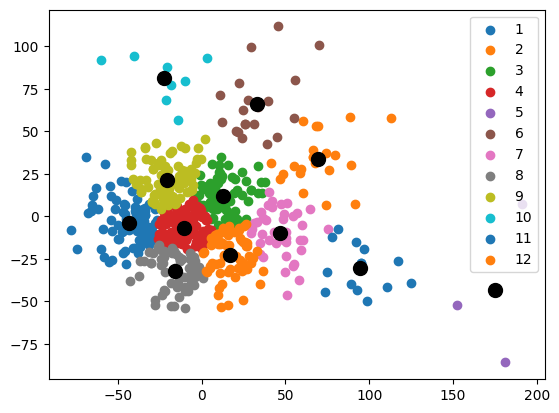

In [13]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

#plotting the results:

for i in u_labels:
    plt.scatter(data_z[label == i , 0] , data_z[label == i , 1] , label = i+1)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 12, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)
#X['clusters'] = clustering_kmeans.fit_predict(X)

#kmeans = KMeans(n_clusters = 12, init = 'k-means++', random_state = 42)
#y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
label = kmeans.fit_predict(data)

print(label)

[ 1  9  0  6  7  1  0  5  9  7  2  5  7  7  7  6  0  6  3  0  6  4  7  1
  5  5  0  7  7  2  7  0  0  3  2  0  6  7  2  2  0  3  4  0  3  0  1  7
  8  0  0  6  6  2  7  9  7  0  3  9 11  5  2 10  5  3  2  7  4  9  9  6
  3  2  7  0  6  5  2  7  7  6  2  2  0  7  2  3  2  1  7  9  2  1  3  8
  6  7  7  0  6  7  7  9  2  5  6  9  0  1  0  0  9 11  7  9  7  1  7  0
  7  7  3 11  7  7  2  5  7  7  7  7  4  9  0  0  1  2  2  5  2  2  9  1
  4  9  7  2  7  4  2  4 11  7  6  7  0  0  9  7 11  7  8  2  4  2  7  3
  2  9  7  1  8  6  0  7  7  2  2  7  7  4  3  3  1 11  2  3 10  9  2  1
  2  1  8  5  3  7  0  1  4  7  2  2  1  0  7  6  1  3  6 11  7  5  5  5
  7  2  0  0  3 11  7  1  2  2  6  2  9  5  1 11  2  2  7 11  7  1  7  2
  0  6  7  7  7  2  3  0  4  2  6  0  4  4  7  1  6  2 11  0 11  2  5  2
  1  9  1  3  3  9  2  9  2  2  7  1  4  4  2  0  5  7 11  7  2  7  5  9
  4  7  1  7  1  2  7  6 11  7  9 11  4  1  7  9  0  3  9  5  7  1  5  9
  2  0  4  7  2  7  7  2  7 11  7  1  0  5 11  2  7

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


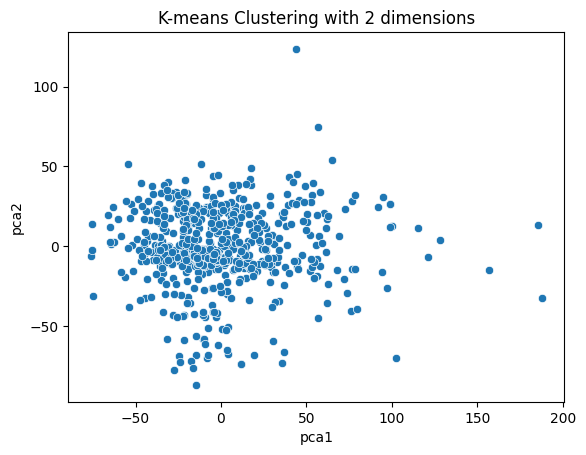

In [16]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

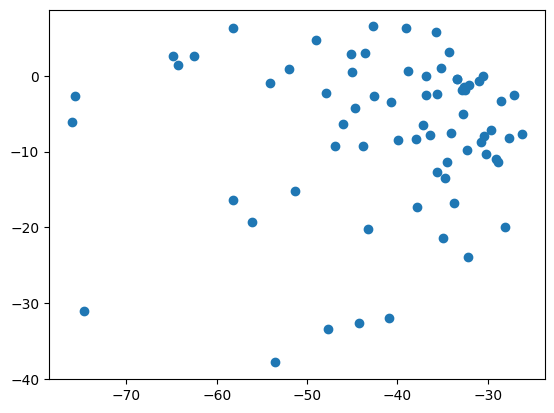

In [17]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = data[label == 0]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

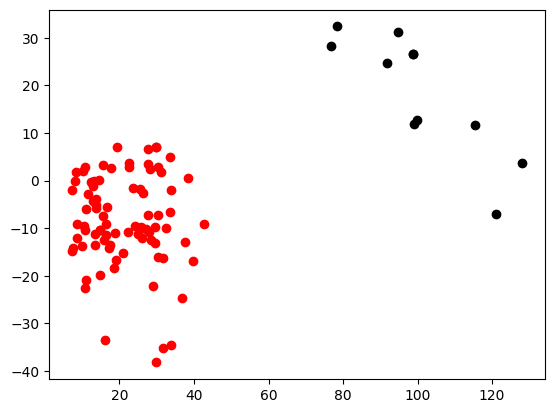

In [18]:
#filter rows of original data
filtered_label2 = data[label == 2]

filtered_label8 = data[label == 8]

#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

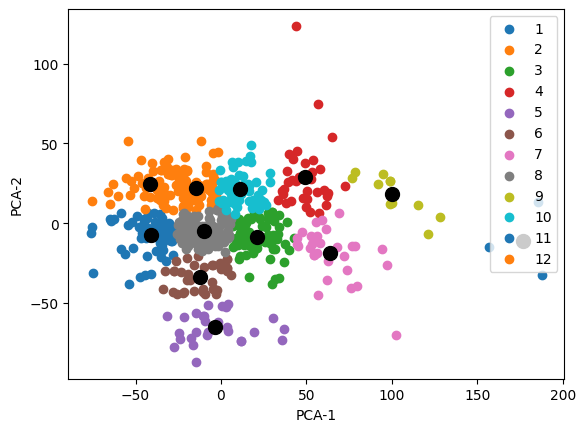

In [19]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

#plotting the results:

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i+1)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.show()

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [71]:
Z = pd.read_csv('Spotify-Clean2.csv')

Z = Z.drop('Unnamed: 0', axis = 1)
Z = Z.drop('title', axis = 1)
Z = Z.drop('artist', axis = 1)
#Z = Z.drop('top_genre', axis = 1)

# Handling the missing values
Z.fillna(method ='ffill', inplace = True)

print(Z.head())

         top_genre  year  bpm  nrgy  dnce  decibel  live  val  dur  acous  \
0       neo mellow  2010   97    89    67       -4     8   80  217     19   
1  detroit hip hop  2010   87    93    75       -5    52   64  263     24   
2        dance pop  2010  120    84    76       -3    29   71  200     10   
3        dance pop  2010  119    92    70       -4     8   71  295      0   
4              pop  2010  109    84    64       -5     9   43  221      2   

   spch  popularity  
0     4          83  
1    23          82  
2    14          80  
3     4          79  
4     4          78  


In [72]:
modified_Z = Z

In [73]:
#adds all instances of pop in the genre column into one shared genre
for i in modified_Z.top_genre:
    if 'pop' in i:
        modified_Z.top_genre = modified_Z.top_genre.replace(i, 'pop')

    elif 'hip hop' in i:
        modified_Z.top_genre = modified_Z.top_genre.replace(i, 'hip hop')

    elif 'edm' in i:
        modified_Z.top_genre = modified_Z.top_genre.replace(i, 'edm')

    elif 'r&b' in i:
        modified_Z.top_genre = modified_Z.top_genre.replace(i, 'pop')

    elif 'latin' in i:
        modified_Z.top_genre = modified_Z.top_genre.replace(i, 'latin')

    elif 'room' in i:
        modified_Z.top_genre = modified_Z.top_genre.replace(i, 'room')

    elif 'electro' in i:
        modified_Z.top_genre = modified_Z.top_genre.replace(i, 'edm')

#replaces all instances of chicago rap with hip hop
modified_Z.top_genre = modified_Z.top_genre.replace('chicago rap', 'hip hop')

In [74]:
cull_Z = modified_Z
value_counts = cull_Z.stack().value_counts()
culled_Z = value_counts[value_counts <= 3].index
#culled = value_counts[value_counts <= 5].index
cull_Z.replace(culled_Z, 'other', inplace=True)
cull_Z.top_genre.value_counts()

pop                 495
hip hop              15
boy band             15
other                13
room                 12
edm                  12
british soul         11
neo mellow            9
complextro            6
australian dance      6
latin                 5
permanent wave        4
Name: top_genre, dtype: int64

In [75]:
Z = cull_Z.drop('top_genre', axis = 1)

In [76]:
Z = Z[(Z.spch != 'other')]
Z = Z[Z.nrgy != ('other')]
Z = Z[Z.bpm != ('other')]
Z = Z[Z.dur != ('other')]
Z = Z[Z.dnce != ('other')]
Z = Z[Z.live != ('other')]
Z = Z[Z.val != ('other')]
Z = Z[Z.acous != ('other')]
Z = Z[Z.popularity != ('other')]
Z = Z[Z.year != ('other')]
Z = Z[Z.decibel != ('other')]

In [77]:
Z.head()

,year,bpm,nrgy,dnce,decibel,live,val,dur,acous,spch,popularity
0,2010,97,89,67,-4,8,80,217,19,4,83
1,2010,87,93,75,-5,52,64,263,24,23,82
2,2010,120,84,76,-3,29,71,200,10,14,80
5,2010,65,86,73,-5,11,54,214,4,14,77
6,2010,120,78,75,-4,4,82,203,0,9,77


In [78]:

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
Z_normalized = normalize(Z_scaled)

# Converting the numpy array into a pandas DataFrame
Z_normalized = pd.DataFrame(Z_normalized)

In [79]:

pca = PCA(n_components = 2)
Z_principal = pca.fit_transform(Z_normalized)
Z_principal = pd.DataFrame(Z_principal)
Z_principal.columns = ['P1', 'P2']
print(Z_principal.head())

         P1        P2
0 -0.495583 -0.099062
1 -0.223268  0.244436
2 -0.673630 -0.103353
3 -0.217028 -0.072144
4 -0.616752 -0.282419


In [101]:
# Numpy array of all the cluster labels assigned to each data point
# eps = radius of the cluster around the centroid point
db_default = DBSCAN(eps = 0.0375, min_samples = 4).fit(Z_principal)
labels = db_default.labels_

In [102]:
print(np.unique(labels))

[-1  0  1  2  3  4  5  6  7  8  9 10 11]


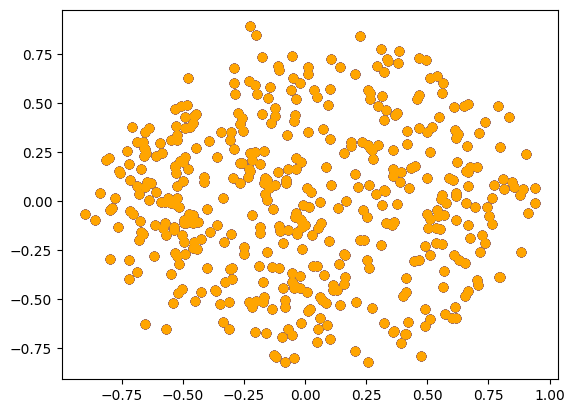

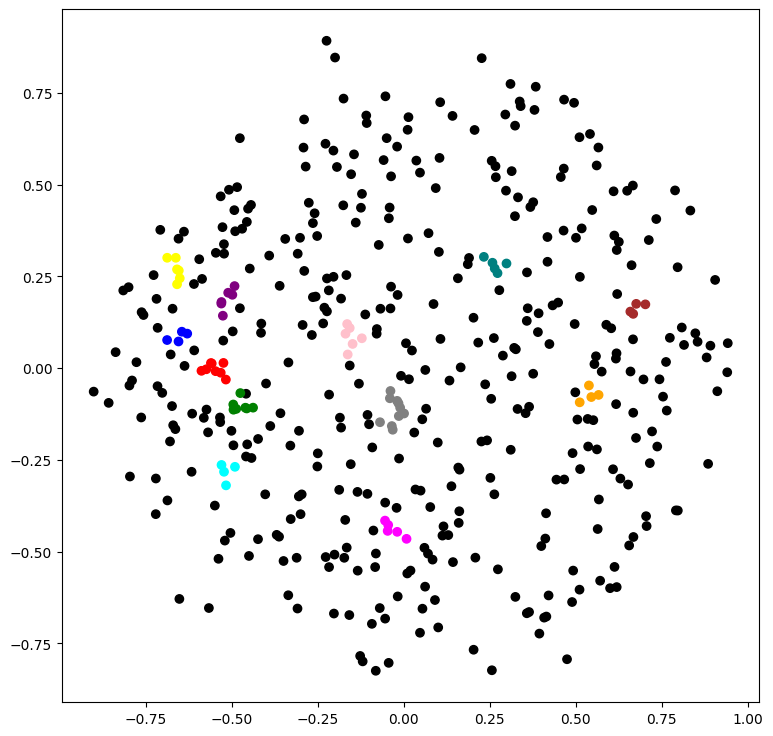

In [104]:

# Building the label to colour mapping
colours = {}
colours[-1] = 'black'
colours[0] = 'green'
colours[1] = 'blue'
colours[2] = 'yellow'
colours[3] = 'pink'
colours[4] = 'red'
colours[5] = 'teal'
colours[6] = 'magenta'
colours[7] = 'cyan'
colours[8] = 'purple'
colours[9] = 'brown'
colours[10] = 'grey'
colours[11] = 'orange'


# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
black = plt.scatter(Z_principal['P1'], Z_principal['P2'], color ='black');
green = plt.scatter(Z_principal['P1'], Z_principal['P2'], color ='green');
blue = plt.scatter(Z_principal['P1'], Z_principal['P2'], color ='blue');
yellow = plt.scatter(Z_principal['P1'], Z_principal['P2'], color ='yellow');
pink = plt.scatter(Z_principal['P1'], Z_principal['P2'], color ='pink');
red = plt.scatter(Z_principal['P1'], Z_principal['P2'], color ='red');
teal = plt.scatter(Z_principal['P1'], Z_principal['P2'], color ='teal');
magenta = plt.scatter(Z_principal['P1'], Z_principal['P2'], color ='magenta');
cyan = plt.scatter(Z_principal['P1'], Z_principal['P2'], color ='cyan');
purple = plt.scatter(Z_principal['P1'], Z_principal['P2'], color ='purple');
brown = plt.scatter(Z_principal['P1'], Z_principal['P2'], color ='brown');
grey = plt.scatter(Z_principal['P1'], Z_principal['P2'], color ='grey');
orange = plt.scatter(Z_principal['P1'], Z_principal['P2'], color ='orange');

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(Z_principal['P1'], Z_principal['P2'], c = cvec)

# Building the legend
#plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()